In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.stats.api as sms

pd.options.display.max_columns=100

In [2]:
df=pd.read_excel(r"C:\Users\berid\python\csv_files\Al Bundy Shoes.xlsx",'Al Bundy')

In [3]:
df['Date']=pd.to_datetime(df['Date'])

In [4]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [5]:
df

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice,Year,Month
0,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,159.0,2014,1
1,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,159.2,2014,1
2,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,119.2,2014,1
3,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,159.0,2014,1
4,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,159.0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31 13:35:12,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,139.0,2016,12
14963,65774,2016-12-31 14:32:48,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,149.0,2016,12
14964,65775,2016-12-31 15:59:12,Canada,2203,CAN6,Male,10.5,43-44,10.0,179,0.3,125.3,2016,12
14965,65776,2016-12-31 17:54:24,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,199.0,2016,12


C:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


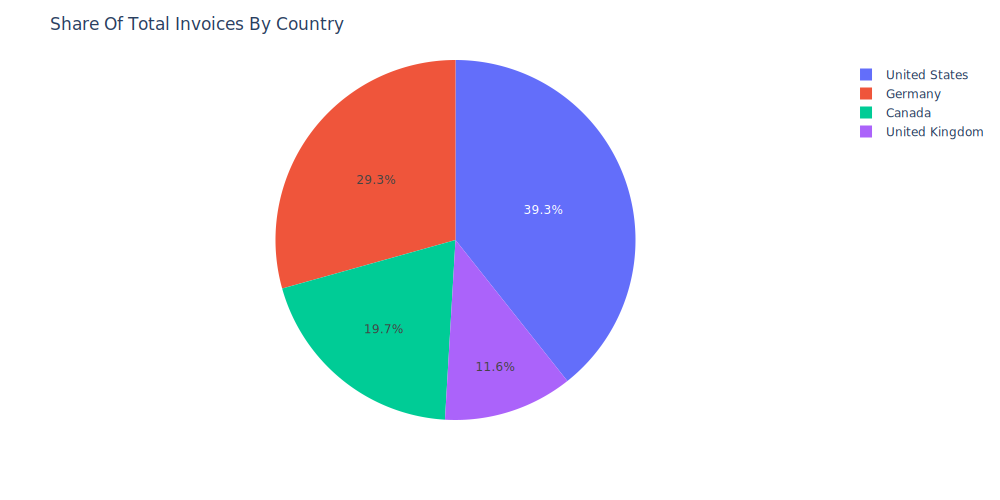

In [6]:
g=df['Country'].value_counts()

fig=px.pie(labels=g.index,values=g.values,names=g.index,hover_name=g.index)
fig.update_layout(title=dict(text='Share Of Total Invoices By Country',font_family='Arial Black'),
                  height=500,width=1000)
fig.show('svg')

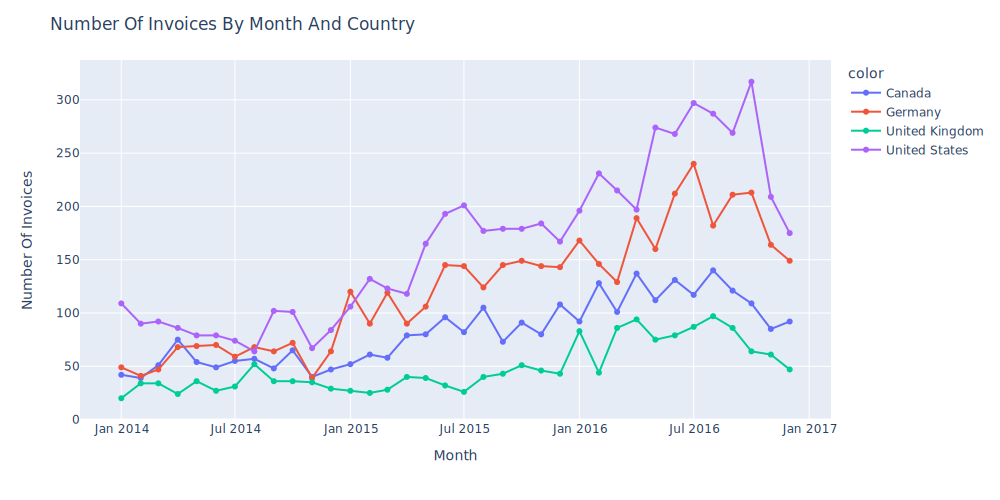

In [7]:
g=df.groupby([df['Date'].dt.to_period('M'),'Country'])['InvoiceNo'].count().sort_index(level=[1,0])

fig=px.line(x=[str(i[0]) for i in g.index],y=g.values,color=[i[1] for i in g.index],markers='.')
fig.update_layout(title=dict(text='Number Of Invoices By Month And Country',font_family='Arial Black'),
                  height=500,width=1000)
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number Of Invoices')
fig.show('svg')

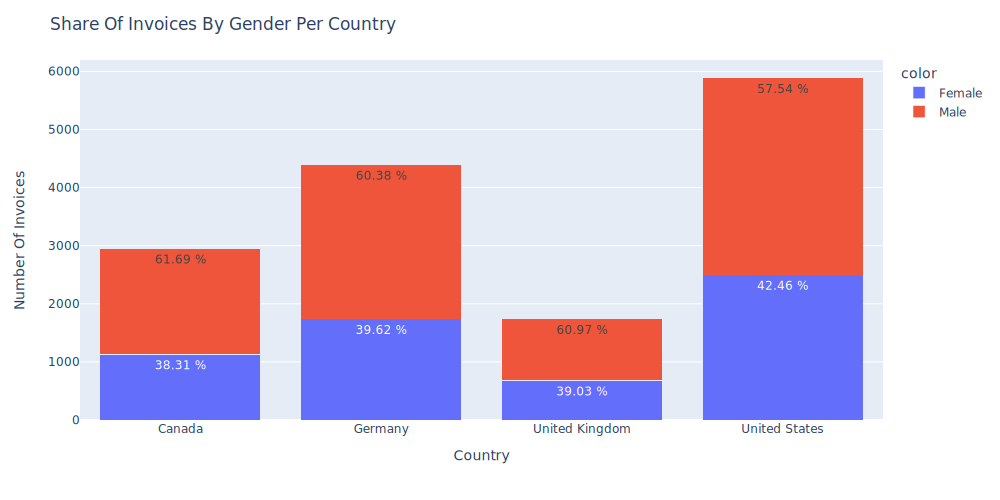

In [8]:
g=df.groupby(['Gender','Country'])['InvoiceNo'].count().sort_index(level=1)
percentages=[str(i)+' %' for i in g.groupby(level=1).transform(lambda x:(x/x.sum()*100).round(2))]

fig=px.bar(x=[str(i[1]) for i in g.index],y=g.values,color=[i[0] for i in g.index],barmode='stack',text=percentages)
fig.update_layout(title=dict(text='Share Of Invoices By Gender Per Country',font_family='Arial Black'),
                  height=500,width=1000)
fig.update_xaxes(title_text='Country')
fig.update_yaxes(title_text='Number Of Invoices')
fig.show('svg')

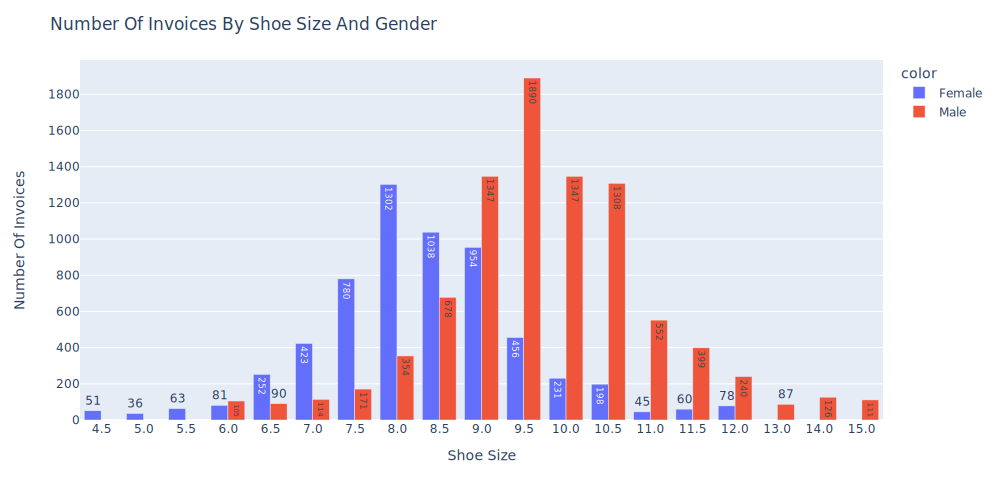

In [9]:
g=df.groupby(['Size (US)','Gender'])['InvoiceNo'].count().sort_index(level=[0,1])

fig=px.bar(x=[str(i[0]) for i in g.index],y=g.values,color=[i[1] for i in g.index],barmode='group',text=g.values)
fig.update_layout(title=dict(text='Number Of Invoices By Shoe Size And Gender',font_family='Arial Black'),
                  height=500,width=1000)
fig.update_xaxes(title_text='Shoe Size')
fig.update_yaxes(title_text='Number Of Invoices')
fig.show('svg')

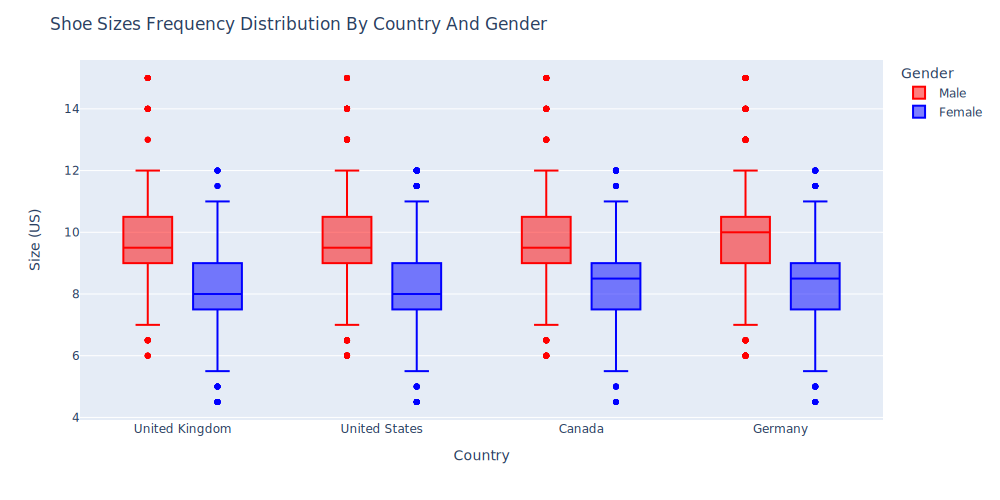

In [10]:
fig=px.box(df,x='Country',y='Size (US)',color='Gender',color_discrete_sequence=["Red", "Blue"])
fig.update_layout(title=dict(text='Shoe Sizes Frequency Distribution By Country And Gender',font_family='Arial Black'),
                  height=500,width=1000)
fig.show('svg')

# Confidence Intervals 

In [11]:
# find 95% confidence interval for population mean of monthly sales per shoe size

p=df.query('Gender=="Male" and Year==2016 and Country=="United States"')\
.pivot_table(index='Size (US)',columns='Month',values='InvoiceNo',aggfunc='count')
p['Row Total']=p.sum(axis=1)
p.loc['Column Total']=p.sum()
p=p.fillna(0)


mean=p.iloc[:,:-1].mean(axis=1)
std=p.iloc[:,:-1].std(axis=1)
n=len(p.iloc[:,:-1].columns)
# t statistic, when degree of freedom is 11 and confidence interval is 95% 
t=2.18
st_error=std/(n**0.5)
ci_min=mean-t*st_error
ci_max=mean+t*st_error
p['CI_Min']=ci_min
p['CI_Max']=ci_max
p

Month,1,2,3,4,5,6,7,8,9,10,11,12,Row Total,CI_Min,CI_Max
Size (US),,,,,,,,,,,,,,,
6.0,4.0,1.0,3.0,1.0,3.0,3.0,3.0,4.0,3.0,7.0,3.0,0.0,35.0,1.795459,4.037874
6.5,3.0,2.0,0.0,1.0,0.0,0.0,1.0,7.0,2.0,1.0,2.0,1.0,20.0,0.456657,2.876676
7.0,0.0,0.0,1.0,0.0,6.0,4.0,4.0,2.0,3.0,0.0,0.0,0.0,20.0,0.342980,2.990354
7.5,3.0,2.0,3.0,1.0,7.0,0.0,7.0,3.0,4.0,6.0,1.0,1.0,38.0,1.652668,4.680666
8.0,7.0,9.0,7.0,3.0,12.0,2.0,9.0,4.0,7.0,5.0,2.0,6.0,73.0,4.158415,8.008252
8.5,12.0,12.0,8.0,8.0,15.0,9.0,17.0,17.0,6.0,9.0,10.0,6.0,129.0,8.303471,13.196529
9.0,17.0,13.0,13.0,11.0,21.0,22.0,25.0,30.0,26.0,25.0,13.0,10.0,226.0,14.541300,23.125367
9.5,19.0,25.0,27.0,24.0,26.0,33.0,25.0,47.0,31.0,44.0,37.0,26.0,364.0,24.997942,35.668724
10.0,17.0,26.0,26.0,19.0,16.0,31.0,25.0,24.0,23.0,31.0,15.0,20.0,273.0,19.333279,26.166721


In [12]:
# find 95% confidence interval for two population mean monthly sales difference per shoe size,assuming that population variances are same

p1=df.query('Gender=="Female" and Year==2016 and Shop=="GER1"')\
.pivot_table(index='Size (US)',columns='Month',values='InvoiceNo',aggfunc='count')\
.fillna(0)

p2=df.query('Gender=="Female" and Year==2016 and Shop=="GER2"')\
.pivot_table(index='Size (US)',columns='Month',values='InvoiceNo',aggfunc='count')\
.fillna(0)

merged=p1.merge(p2,how='outer',left_index=True,right_index=True)

In [13]:
merged.drop(columns='CI95%',inplace=True,errors='ignore')

CI=[]
for i in range(len(merged.index)):
    sample1=merged.iloc[i,:12]
    sample2=merged.iloc[i,12:]
    cm = sms.CompareMeans(sms.DescrStatsW(sample1), sms.DescrStatsW(sample2)).tconfint_diff(usevar='pooled', alpha=0.05)
    CI.append([i.round(2) for i in cm])
    
merged['CI95%']=CI
merged

Month,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,CI95%
Size (US),,,,,,,,,,,,,,,,,,,,,,,,,
4.5,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[-0.23, 0.9]"
5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,"[-0.49, 0.49]"
5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,"[-0.68, 0.18]"
6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-1.11, 0.27]"
6.5,3.0,3.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,3.0,4.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,3.0,0.0,"[-0.37, 1.54]"
7.0,0.0,3.0,3.0,4.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,4.0,"[-1.57, 0.91]"
7.5,1.0,2.0,4.0,1.0,2.0,6.0,4.0,3.0,5.0,8.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,7.0,9.0,8.0,14.0,8.0,6.0,3.0,"[-4.83, 0.66]"
8.0,6.0,10.0,3.0,9.0,1.0,3.0,6.0,8.0,3.0,12.0,3.0,9.0,13.0,6.0,5.0,13.0,5.0,3.0,11.0,6.0,6.0,9.0,8.0,3.0,"[-4.21, 1.71]"
8.5,10.0,10.0,10.0,7.0,14.0,4.0,7.0,7.0,4.0,8.0,7.0,9.0,8.0,5.0,10.0,4.0,5.0,5.0,9.0,7.0,3.0,7.0,9.0,8.0,"[-0.72, 3.55]"
